In [185]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pylab as pl
from utils import * # Some preprocessing function

#seaborn
import seaborn as sns
import networkx as nx

In [99]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
pd.set_option('display.float_format', lambda x: '%.5f' % x) # float display format

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h2>Dataset Overview</h2>

In [101]:
df_train = pd.read_csv('./data/train.csv')

In [102]:
# View first three data
df_train.head(3)

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.00000,3.00000,2.00000,1115,...,unspecified,NaN,116.00000,https://www.99.co/singapore/hdb/866-yishun-str...,1.41440,103.83720,0,yishun south,yishun,514500
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.00000,4.00000,2.00000,1575,...,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.37260,103.87562,0,serangoon north,serangoon,995400
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.00000,4.00000,6.00000,3070,...,partial,"studio, 3, 4, 5, 6 br",56.00000,https://www.99.co/singapore/condos-apartments/...,1.29877,103.89580,0,mountbatten,marine parade,8485000


In [103]:
# Overview of numerical data
df_train.describe()

,listing_id,built_year,num_beds,num_baths,size_sqft,total_num_units,lat,lng,elevation,price
count,20254.00000,19332.00000,20174.00000,19820.00000,20254.00000,14602.00000,20254.00000,20254.00000,20254.00000,20254.00000
mean,550763.20643,2010.83370,3.12293,2.64354,1854.36373,376.25394,1.33998,103.84315,0.00000,5228263.49363
std,258874.42011,15.82280,1.28166,1.47383,13543.43289,346.88247,0.04630,0.05410,0.00000,277974781.18964
min,100043.00000,1963.00000,1.00000,1.00000,0.00000,4.00000,1.23962,103.68521,0.00000,0.00000
25%,326279.00000,2000.00000,2.00000,2.00000,807.00000,106.00000,1.30730,103.80667,0.00000,819000.00000
50%,551397.00000,2017.00000,3.00000,2.00000,1119.00000,296.00000,1.32821,103.84155,0.00000,1680000.00000
75%,774044.50000,2023.00000,4.00000,3.00000,1528.00000,561.00000,1.37111,103.88016,0.00000,3242400.00000
max,999944.00000,2028.00000,10.00000,10.00000,1496000.00000,2612.00000,1.46158,103.99751,0.00000,39242425300.00000


In [104]:
# Information about attributes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20254 entries, 0 to 20253
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            20254 non-null  int64  
 1   title                 20254 non-null  object 
 2   address               20254 non-null  object 
 3   property_name         20254 non-null  object 
 4   property_type         20254 non-null  object 
 5   tenure                18531 non-null  object 
 6   built_year            19332 non-null  float64
 7   num_beds              20174 non-null  float64
 8   num_baths             19820 non-null  float64
 9   size_sqft             20254 non-null  int64  
 10  floor_level           3508 non-null   object 
 11  furnishing            20254 non-null  object 
 12  available_unit_types  18813 non-null  object 
 13  total_num_units       14602 non-null  float64
 14  property_details_url  20254 non-null  object 
 15  lat                

In [105]:
# Check number of NA
df_train.isnull().sum()

listing_id                  0
title                       0
address                     0
property_name               0
property_type               0
tenure                   1723
built_year                922
num_beds                   80
num_baths                 434
size_sqft                   0
floor_level             16746
furnishing                  0
available_unit_types     1441
total_num_units          5652
property_details_url        0
lat                         0
lng                         0
elevation                   0
subzone                     0
planning_area               0
price                       0
dtype: int64

<h3>Target Feature Cleaning</h3>

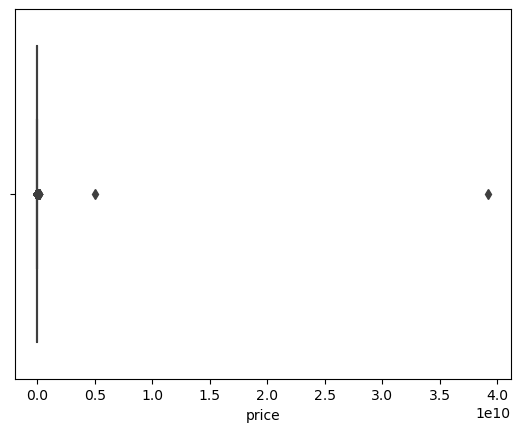

In [106]:
"""
Price data distribution
"""
sns.boxplot(data=df_train, x="price")
plt.show()

In [107]:
"""
Price data cleaning
"""
df= df_train.copy()
#   1. Remove large price
price_outlier = get_outlier(df,'price')
df = df.drop(price_outlier)
print("Num before clean", df_train.shape[0])
print('Num after clean', df.shape[0])

#   2. Remove 0 price
df = df[df.price>0]
print('Num after clean', df.shape[0])

Num before clean 20254
Num after clean 20252
Num after clean 20151


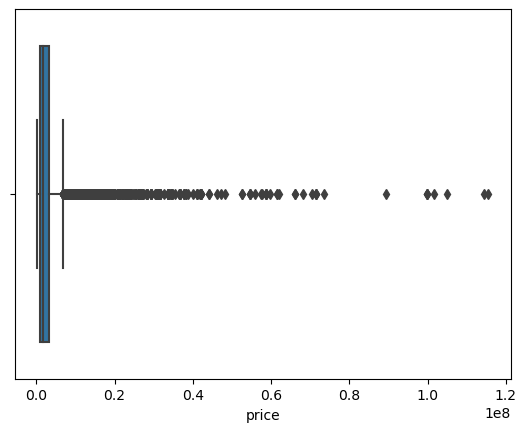

In [108]:
"""
Price data distribution after cleaning
"""
sns.boxplot(data=df, x="price")
plt.show()

<h3> Process categorical attributes</h3>

**No large correlations**: title, address, property_details_url,available_unit_types<br>
**Possibly correlations**:property_name,property_type,subzone, planning_area<br>
**Missing values**: floor_level,furnishing,tenure"

<h4>Property type</h4>

In [109]:
# View different property types
print(df.property_type.unique())
print(len(df.property_type.unique()))

['hdb 4 rooms' 'hdb' 'condo' 'Condo' 'bungalow' 'Hdb' 'terraced house'
 'Hdb Executive' 'apartment' 'Semi-Detached House' 'Apartment'
 'Hdb 4 Rooms' 'semi-detached house' 'hdb 3 rooms' 'executive condo'
 'corner terrace' 'hdb executive' 'Hdb 3 Rooms' 'Hdb 5 Rooms'
 'hdb 5 rooms' 'landed' 'hdb 2 rooms' 'Executive Condo' 'Bungalow'
 'Corner Terrace' 'Terraced House' 'cluster house' 'Cluster House'
 'Land Only' 'townhouse' 'Hdb 2 Rooms' 'conservation house' 'land only'
 'walk-up' 'Townhouse' 'Conservation House' 'good class bungalow' 'Landed'
 'shophouse']
39


In [110]:
# Standardize property name
df['general_property_type'] = df['property_type'].apply(generalize_property_type)
df['property_type'] = df['property_type'].apply(standardize_property_type)

# Group data by general property type
df_hdb = df[df['general_property_type']=='hdb']
df_condo = df[df['general_property_type']=='condo']
df_landed = df[df['general_property_type']=='landed']

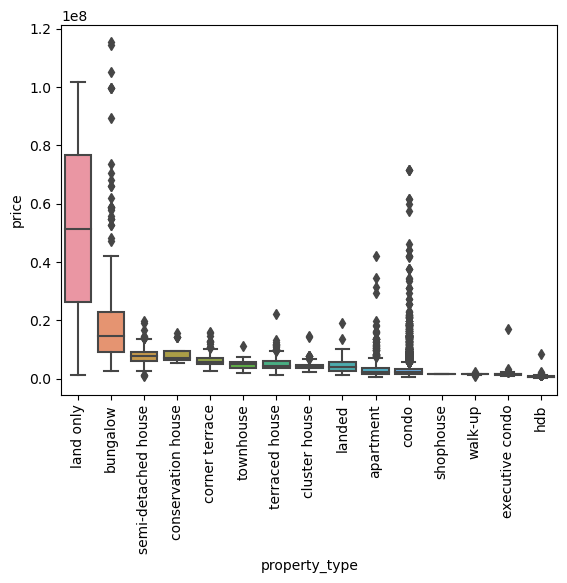

In [111]:
# Box plot of property_type
table = df.groupby(['property_type'],as_index=False)['price'].median().sort_values(by='price',ascending=False)
a1 = sns.boxplot(data=df,x='property_type',y="price",order=table['property_type'].to_list())
a1.set_xticklabels(a1.get_xticklabels(), rotation=90)
plt.show()

In [112]:
# ordered Table based on mean of price for each property types
# Reference for ordinal encoding property type
table = df.groupby(['property_type'])['property_type','price'].agg({"property_type":"count","price":['mean','median']})
table = table.sort_values(by=("price","median"),ascending=False)
table.style.background_gradient(cmap="Reds")

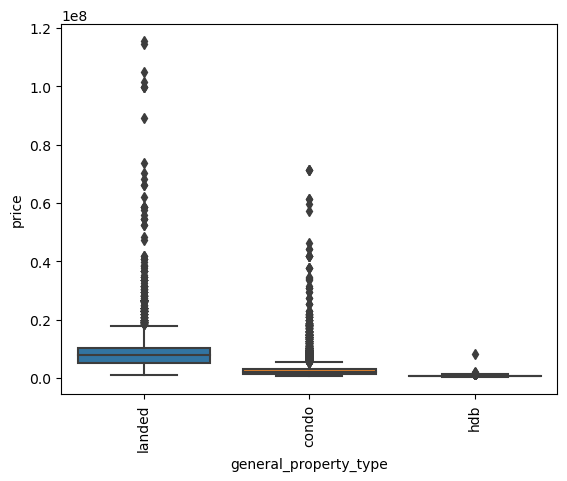

In [113]:
# Price distribution of general property type
table = df.groupby(['general_property_type'],as_index=False)['price'].median().sort_values(by='price',ascending=False)
a1 = sns.boxplot(data=df,x='general_property_type',y="price",order=table['general_property_type'].to_list())
a1.set_xticklabels(a1.get_xticklabels(), rotation=90)
plt.show()

<h4>Subzone</h4>

In [114]:
# View price variation between meand and std of each subzone
table = df.groupby(['subzone'])['subzone','price'].agg({"subzone":"count","price":['mean',"std"]})
table = table.sort_values(by=("price","mean"),ascending=False)
table = table.iloc[:10] #Only show first 10 subzones
table.style.background_gradient(cmap="Reds")

In [115]:
print('Number of subzone:', len(df.subzone.unique()))

Number of subzone: 244


<h4>Planning area</h4>

In [116]:
# From the result, we observes that the variation between planning area is larger than subzone
table = df.groupby(['planning_area'])['planning_area','price'].agg({"planning_area":"count","price":['mean',"std"]})
table = table.sort_values(by=("price","mean"),ascending=False)
table = table.iloc[:10] #Only show first 10 planning area
table.style.background_gradient(cmap="Reds")

In [117]:
print('Number of planning area:', len(df.planning_area.unique()))

Number of planning area: 43


<h4>Floor level</h4>

In [118]:
# Proportion of data helds missing floor_level
na_pct = df.floor_level.isna().sum()/df.shape[0]
print("percentage of na in floor level is", na_pct)

percentage of na in floor level is 0.8259143466825468


In [119]:
# NUmber of data helds missing floor_level accross different general_property_type
df_fl_na = df[df.floor_level.isna()]
table = df_fl_na.groupby(['general_property_type'])['general_property_type'].agg([('general_property_type', 'count')])
table.head()

,general_property_type
general_property_type,
condo,9050
hdb,5069
landed,2524


In [120]:
# Group data with non-missing values in different floor level
df.floor_level.unique()
df_fl = df[~df.floor_level.isna()]
df_low = df_fl[df_fl.floor_level.str.contains('low')]
df_mid = df_fl[df_fl.floor_level.str.contains('mid')]
df_high = df_fl[df_fl.floor_level.str.contains('high')]

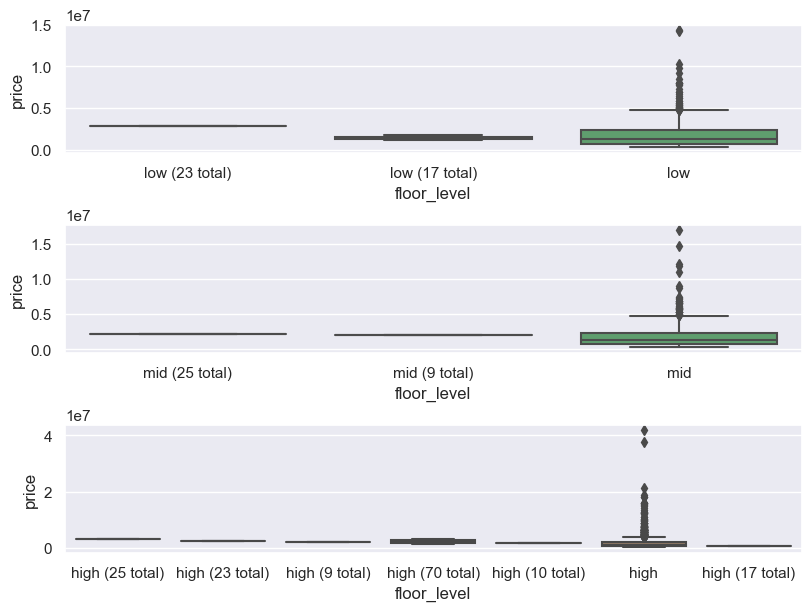

In [214]:
# Distribution of price for different floor level
fig = plt.figure(constrained_layout=True,figsize=(8,6))
gs = matplotlib.gridspec.GridSpec(3, 3, figure=fig)
group_att = 'floor_level'

#   LOW
plt.subplot(gs[0,:])
table = df_low.groupby([group_att],as_index=False)['price'].median().sort_values(by='price',ascending=False)
a2 = sns.boxplot(data=df_low,x=group_att ,y="price",order=table[group_att].to_list())
#a2.set_xticklabels(a2.get_xticklabels(), rotation=90);
#   MID
plt.subplot(gs[1,:])
table = df_mid.groupby([group_att],as_index=False)['price'].median().sort_values(by='price',ascending=False)
a2 = sns.boxplot(data=df_mid,x=group_att ,y="price",order=table[group_att].to_list())
#a2.set_xticklabels(a2.get_xticklabels(), rotation=90)
#   HIGH
plt.subplot(gs[2,:])
table = df_high.groupby([group_att],as_index=False)['price'].median().sort_values(by='price',ascending=False)
a2 = sns.boxplot(data=df_high,x=group_att ,y="price",order=table[group_att].to_list())
#a2.set_xticklabels(a2.get_xticklabels(), rotation=90)
plt.show()

<h4>Tenure</h4>

In [95]:
# Proportion of data with missing tenure
na_pct = df.tenure.isna().sum()/df.shape[0]
print("percentage of na in tenure is", na_pct)

percentage of na in tenure is 0.08550444146692472


In [124]:
# Sorted median of data with different tenure year
table = df.groupby(['tenure'])['tenure','price'].agg({"tenure":"count","price":['median',"std"]})
table = table.sort_values(by=("price","median"),ascending=False)
table.style.background_gradient(cmap="Reds")


<h4>Furnishing</h4>

In [128]:
df.furnishing.unique()

array(['unspecified', 'partial', 'unfurnished', 'fully', 'na'],
      dtype=object)

In [129]:
# Proportion of missing value in furnishing (including unspecified)
na_pct = df[(df.furnishing =='na')|(df.furnishing =='unspecified')].shape[0]/df.shape[0]
print("percentage of na in furnishing is", na_pct)

percentage of na in furnishing is 0.7257208079003523


In [130]:
table = df.groupby(['furnishing'])['furnishing','price'].agg({"furnishing":"count","price":['mean',"std"]})
table = table.sort_values(by=("price","mean"),ascending=False)
table.style.background_gradient(cmap="Reds")

<h3>Numerical attributes</h3>

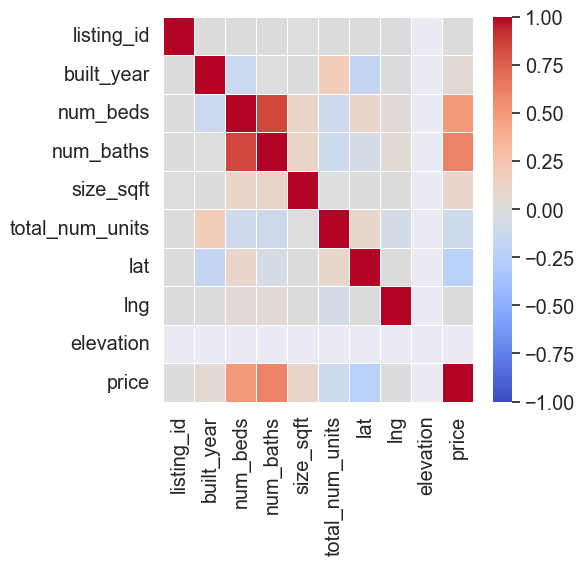

In [131]:
"""
Heat map for visualizing correlations
"""
df_corr = df
corr = df_corr.corr()
fig = plt.figure(figsize=(5,5))
sns.heatmap(corr.T,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0)
plt.show()

**No large correlations**:listing_id,elevation<br>
**Possibly correlated**size_sqft,total_num_units,lat,lng<br>
**Missing value**:built_year,num_beds,num_baths<br>

<h4>Size sqft</h4>

In [132]:
df.size_sqft.describe()

count     20151.00000
mean       1858.04888
std       13577.82883
min          65.00000
25%         807.00000
50%        1119.00000
75%        1528.00000
max     1496000.00000
Name: size_sqft, dtype: float64

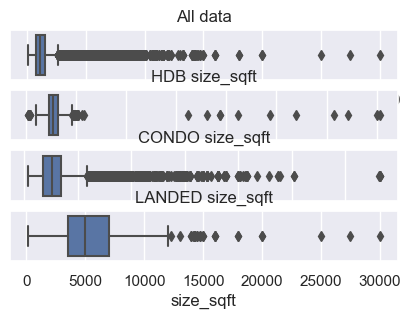

In [147]:
# Distribution of size_sqft  for different general attributes
sns.set(font_scale = 1.0)
fig = plt.figure(constrained_layout=True,figsize=(5,3))
gs = matplotlib.gridspec.GridSpec(4, 3, figure=fig)
plt.subplot(gs[0,:])
a1 = sns.boxplot(data=df,x="size_sqft")
a1.set_yticklabels(a1.get_yticklabels(), rotation=90)
a1.title.set_text('All data')

plt.subplot(gs[1,:])
a1 = sns.boxplot(data=df[df.general_property_type=='hdb'],x="size_sqft")
a1.set_yticklabels(a1.get_yticklabels(), rotation=90)
a1.title.set_text('HDB size_sqft')

plt.subplot(gs[2,:])
a1 = sns.boxplot(data=df[df.general_property_type=='condo'],x="size_sqft")
a1.set_yticklabels(a1.get_yticklabels(), rotation=90)
a1.title.set_text('CONDO size_sqft')

plt.subplot(gs[3,:])
a1 = sns.boxplot(data=df[df.general_property_type=='landed'],x="size_sqft")
a1.set_yticklabels(a1.get_yticklabels(), rotation=90)
a1.title.set_text('LANDED size_sqft')

Text(0.5, 0, 'price')

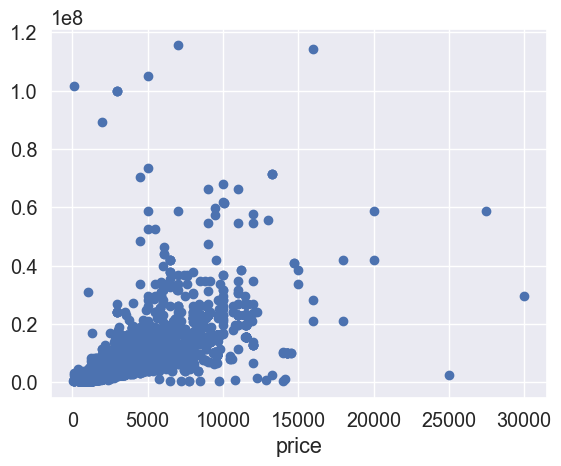

In [136]:
# We observes size_sqft and price has positive correlations
plt.scatter(df.size_sqft,df.price)
plt.xlabel('size_sqft')
plt.xlabel('price')

<h3> Price per square foot </h3>

In [148]:
# Roughly remove outlier in size_sqft
df = df[df.size_sqft<60000]
# Calculate addicional attribute price/sqft
df['per_price'] = df['price']/df['size_sqft']

<h4>Total number of units</h4>

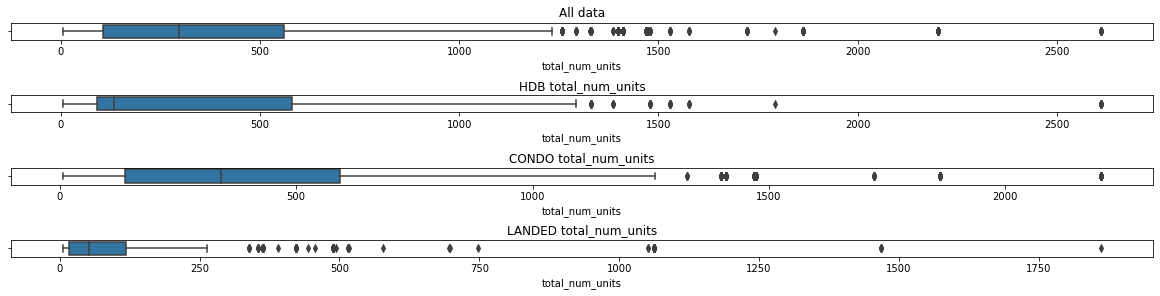

In [168]:
# Distribution of total number of units  for different general attributes
fig = plt.figure(constrained_layout=True,figsize=(16,4))
gs = matplotlib.gridspec.GridSpec(4, 3, figure=fig)
plt.subplot(gs[0,:])
a1 = sns.boxplot(data=df,x="total_num_units")
a1.set_yticklabels(a1.get_yticklabels(), rotation=90)
a1.title.set_text('All data')

plt.subplot(gs[1,:])
a1 = sns.boxplot(data=df[df.general_property_type=='hdb'],x="total_num_units")
a1.set_yticklabels(a1.get_yticklabels(), rotation=90)
a1.title.set_text('HDB total_num_units')

plt.subplot(gs[2,:])
a1 = sns.boxplot(data=df[df.general_property_type=='condo'],x="total_num_units")
a1.set_yticklabels(a1.get_yticklabels(), rotation=90)
a1.title.set_text('CONDO total_num_units')

plt.subplot(gs[3,:])
a1 = sns.boxplot(data=df[df.general_property_type=='landed'],x="total_num_units")
a1.set_yticklabels(a1.get_yticklabels(), rotation=90)
a1.title.set_text('LANDED total_num_units')

Text(0, 0.5, 'price')

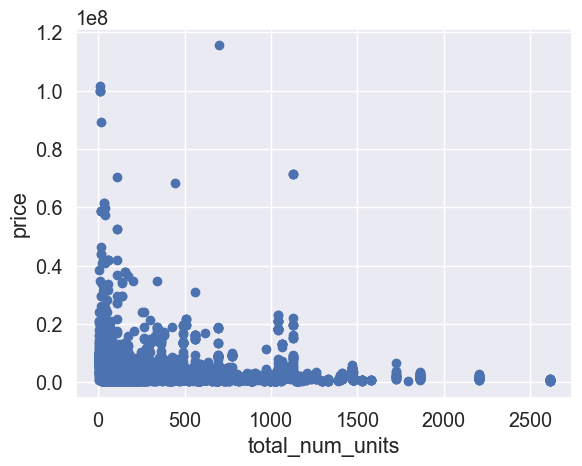

In [137]:
# total_num_units does not show a clear relationship with price
plt.scatter(df.total_num_units,df.price)
plt.xlabel('total_num_units')
plt.ylabel('price')

<h4>Latitude and Longitude</h4>

In [149]:
def group_price(x):
    if x > 3000:
        return '>3000 SGD'
    elif x > 2000:
        return '2000~3000 SGD'
    elif x > 1000:
        return '1000~2000 SGD'
    else:
        return '<1000 SGD'

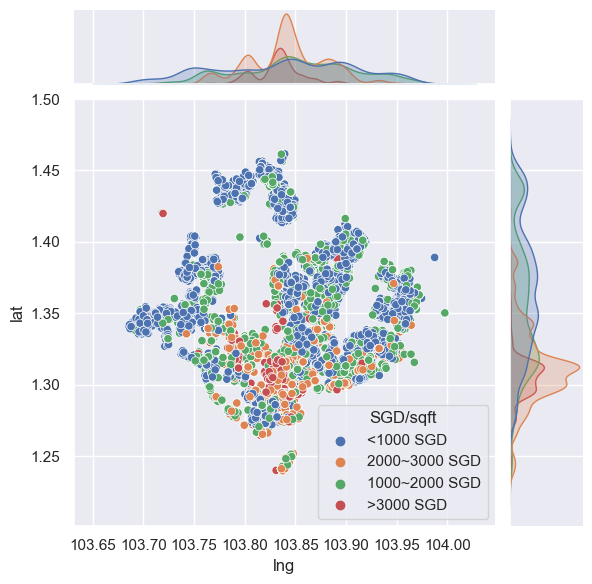

In [150]:
df_plt = df.copy()
df_plt['SGD/sqft'] = df_plt['per_price'].apply(lambda r:group_price(r))
sns.jointplot(data=df_plt, x="lng", y="lat", hue="SGD/sqft")

<h4> Built Year </h4>

In [151]:
print('nan proportion in built year:', df.built_year.isna().sum()/len(df))

nan proportion in built year: 0.045763637266094205


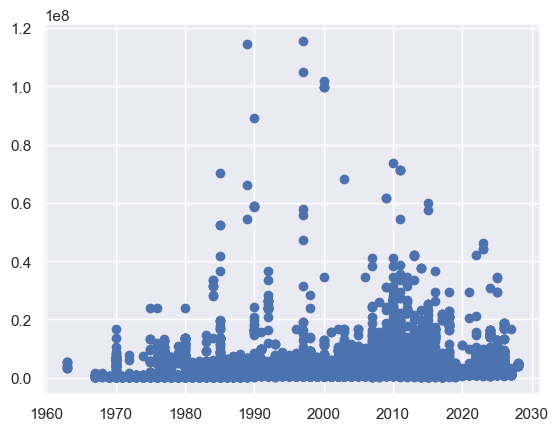

In [152]:
plt.scatter(df.built_year,df.price)

<AxesSubplot:title={'center':'Landed built year distribution'}, xlabel='built_year', ylabel='Count'>

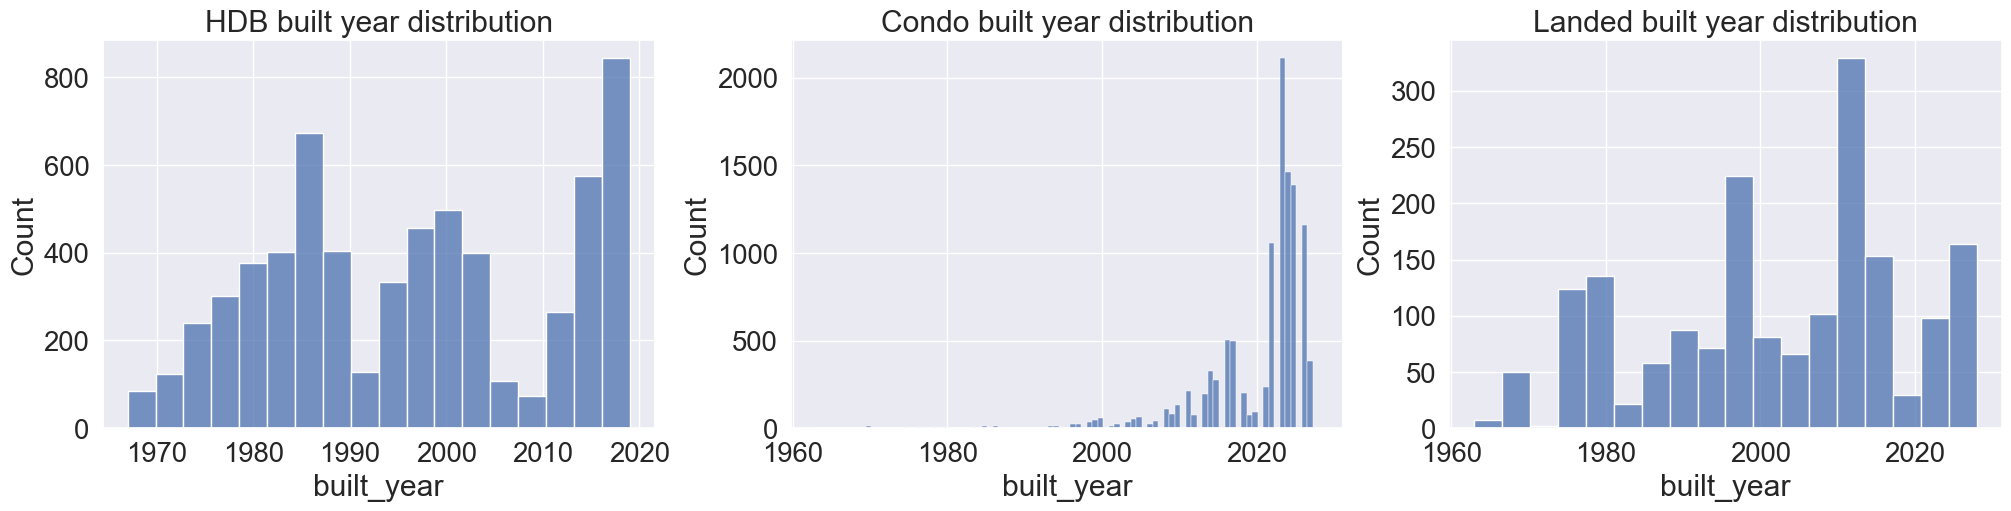

In [156]:
# Distribution of built year in different general property type
sns.set(font_scale=1.8)
fig = plt.figure(constrained_layout=True,figsize=(20,5))
gs = matplotlib.gridspec.GridSpec(3, 3, figure=fig)
group_att = 'floor_level'

ax1 = plt.subplot(gs[:,0])
ax1.title.set_text('HDB built year distribution')
sns.histplot(df_hdb["built_year"])

ax2 = plt.subplot(gs[:,1])
ax2.title.set_text('Condo built year distribution')
sns.histplot(df_condo["built_year"])

ax2 = plt.subplot(gs[:,2])
ax2.title.set_text('Landed built year distribution')
sns.histplot(df_landed["built_year"])

Text(0.5, 1.0, 'Change in price follows built year')

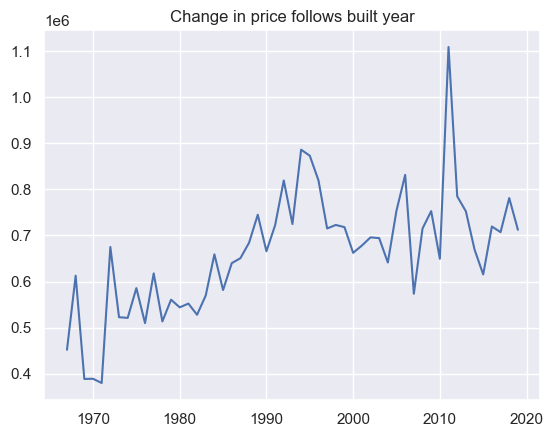

In [160]:
# The change of mean in price following different built_year
sns.set(font_scale=1.)
plt.plot(df_hdb.groupby(['built_year'])["price"].agg([np.mean]))
plt.title('Change in price follows built year')

<h4>Num beds</h4>

In [161]:
na_pct = df.num_beds.isna().sum()/df.shape[0]
print("percentage of na in num_bed is", na_pct)

percentage of na in num_bed is 0.003970814513327046


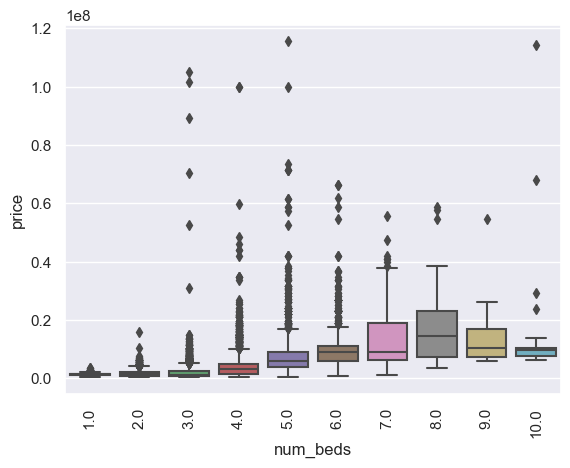

In [162]:
# Distribution of price follows number of bedrooms 
a1 = sns.boxplot(data=df,x='num_beds',y="price")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90)
plt.show()

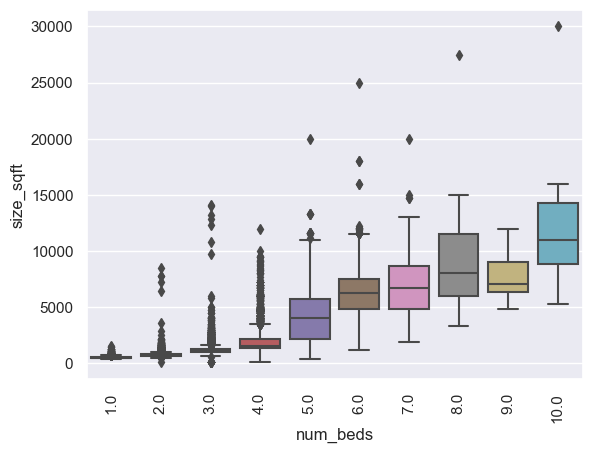

In [165]:
# Distribution of size_sqft follows number of bedrooms 
a1 = sns.boxplot(data=df,x='num_beds',y="size_sqft")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90)
plt.show()

<h4> Num baths </h4>

In [198]:
na_pct = df.num_baths.isna().sum()/df.shape[0]
print("percentage of na in num_bed is", na_pct)

percentage of na in num_bed is 0.02144239837196605


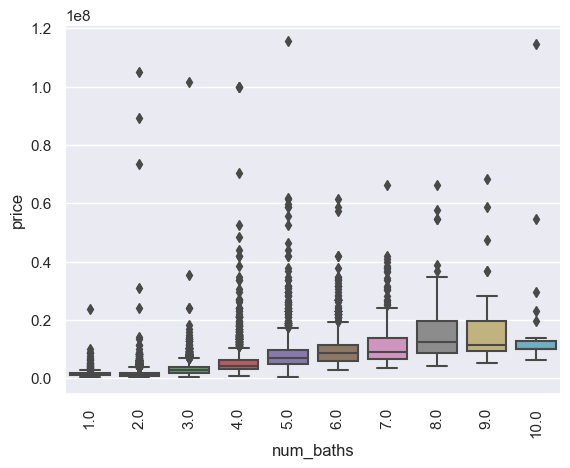

In [163]:
# Distribution of price follows number of bathrooms
a1 = sns.boxplot(data=df,x='num_baths',y="price")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90)
plt.show()

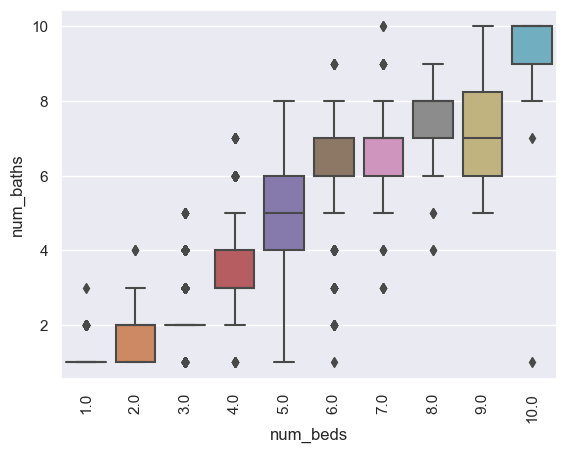

In [166]:
# Distribution of num_baths follows num_beds
# Outliers can be observed from this graph
a1 = sns.boxplot(data=df,x='num_beds',y="num_baths")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90)
plt.show()

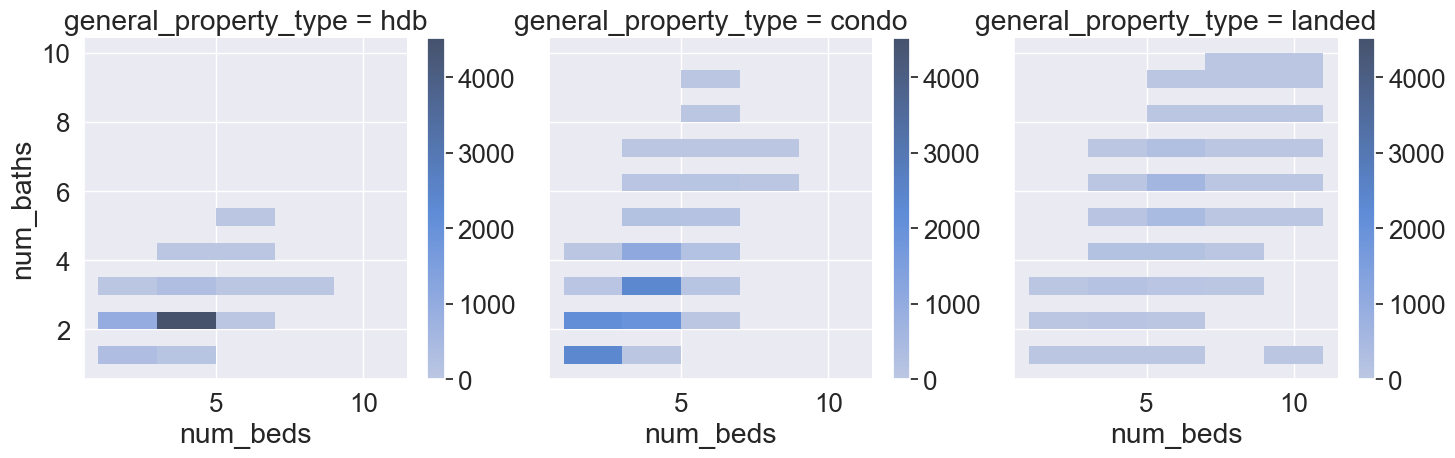

In [172]:
# Distribution of num_baths follows num_beds in different general property type
sns.set(font_scale=1.7)
sns.displot(data=df, col='general_property_type', x='num_beds', y = 'num_baths',binwidth=(2, .5),cbar=True)

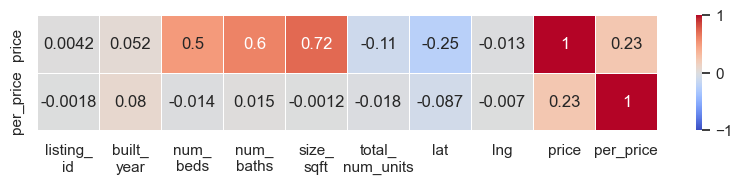

In [168]:
"""
Heat map for visualizing correlations
"""
sns.set(font_scale = 1)
df_corr = df.drop('elevation',axis = 1)
corr = df_corr.corr()[['price','per_price']]#.reshape(10,1)
fig = plt.figure(figsize=(10,1.5))
x_axis_labels = ['listing_\nid','built_\nyear','num_\nbeds','num_\nbaths','size_\nsqft','total_\nnum_units','lat','lng','price','per_price']
sns.heatmap(corr.T,annot=True,xticklabels= x_axis_labels,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0)
plt.show()

<h2> Auxilary data </h2>

<h3>MRT</h3>

<h4> EDA on MRT without considering its importance</h4>

In [183]:
# Load data
df_mrt_connections = pd.read_csv('data/auxiliary-data/sg-mrt-connections.csv')
df_mrt = pd.read_csv('data/auxiliary-data/sg-mrt-stations.csv')

In [184]:
# Distance cauculated based on lat and lng
df = add_distance_to_nearest_mrt(df_mrt, df, 'dist_to_nearest_mrt')
df['dist_to_nearest_mrt_rounded'] = df['dist_to_nearest_mrt'].round(0).astype(int) #Round to integer

Text(0.5, 0, 'price')

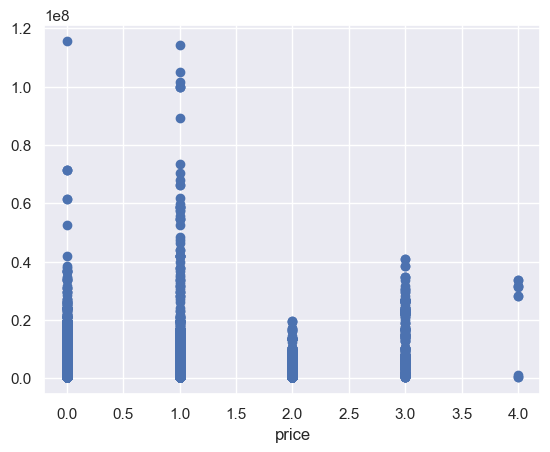

In [203]:
#Distribution of price follows distant to nearest mrt
plt.scatter(df.dist_to_nearest_mrt_rounded,df.price)
plt.xlabel('distance to nearest mrt')
plt.xlabel('price')

<h4> Locate important MRT for further EDA</h4>

In [186]:
# Find important statinons 
G_undirected = nx.Graph()

for idx, row in df_mrt_connections.iterrows():
    G_undirected.add_edge(row['to'], row['from'])

# Use degree centrality
nx_degree_scores = nx.algorithms.centrality.degree_centrality(G_undirected)

ordered_degree_scores = sorted(nx_degree_scores.items(), key=lambda kv: kv[1], reverse=True)

for station, score in ordered_degree_scores[:5]:
    print('{} ({:.5f})'.format(station, score))

important_mrt_stations = [entry[0] for entry in ordered_degree_scores[:50]]
print(important_mrt_stations)

df_important_mrt = df_mrt[df_mrt['name'].isin(important_mrt_stations)]

dhoby ghaut (0.03968)
macpherson (0.03175)
little india (0.03175)
buona vista (0.03175)
chinatown (0.03175)
['dhoby ghaut', 'macpherson', 'little india', 'buona vista', 'chinatown', 'botanic gardens', 'newton', 'serangoon', 'bugis', 'bishan', 'outram park', 'woodlands', 'promenade', 'paya lebar', 'tampines', 'raffles place', 'caldecott', 'expo', 'tanah merah', 'jurong east', 'bayfront', 'marina bay', 'city hall', 'tanjong pagar', 'bright hill', 'mayflower', 'mattar', 'rochor', 'one-north', 'kent ridge', 'downtown', 'telok ayer', 'ubi', 'dover', 'farrer park', 'boon keng', 'clarke quay', 'kaki bukit', 'farrer road', 'holland village', 'harbourfront', 'telok blangah', 'marsiling', 'kranji', 'sengkang', 'buangkok', 'stevens', 'bedok', 'yew tee', 'bukit batok']


In [191]:
# Distance cauculated based on lat and lng
df = add_distance_to_nearest_mrt(df_important_mrt, df, 'dist_to_nearest_important_mrt')
df['dist_to_nearest_important_mrt_rounded'] = df['dist_to_nearest_important_mrt'].round(0).astype(int) #Round to integer

Text(0.5, 0, 'price')

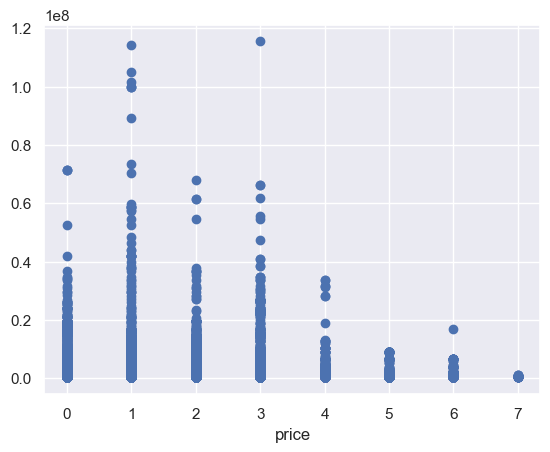

In [204]:
#Distribution of price follows distant to nearest important mrt
# We observed a clearer negative correlation between price and distance in this graph
plt.scatter(df.dist_to_nearest_important_mrt_rounded,df.price)
plt.xlabel('distance to nearest important mrt')
plt.xlabel('price')

<h4> Shopping malls </h4>

In [205]:
#   Load Data
df_shopping_mall = pd.read_csv('./data/auxiliary-data/sg-shopping-malls.csv')
df = add_number_of_nearby_shopping_malls(df_shopping_mall,df)

Text(0.5, 0, 'price')

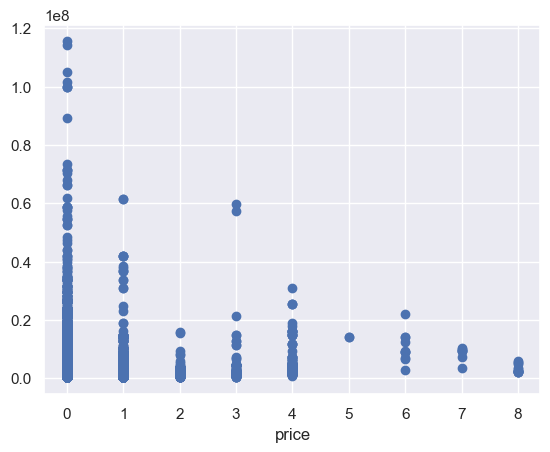

In [219]:
# Distribution of price follow number of nearby shopping malls
plt.scatter(df.number_of_nearby_shopping_malls,df.price)
plt.xlabel('number of nearby shopping mall')
plt.xlabel('price')

<h3> Schools</h3>

<h3> Primary schools </h3>

In [221]:
df_primary_schools = pd.read_csv('./data/auxiliary-data/sg-primary-schools.csv')
df_secondary_schools = pd.read_csv('./data/auxiliary-data/sg-secondary-schools.csv')
#  Within 1km of the property
df = add_number_of_nearby_primary_schools(df_primary_schools, df)
#   Within 1km of the property
df = add_number_of_nearby_secondary_schools(df_secondary_schools, df)

Text(0.5, 0, 'price')

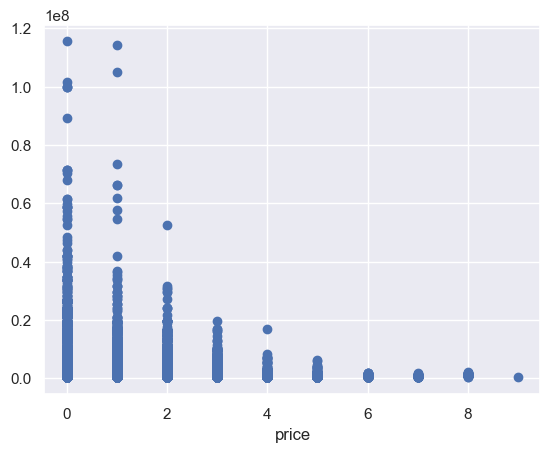

In [222]:
# Distribution of price follow number of nearby primary schools
plt.scatter(df.number_of_nearby_primary_schools,df.price)
plt.xlabel('number of nearby primary schools')
plt.xlabel('price')

Text(0.5, 0, 'price')

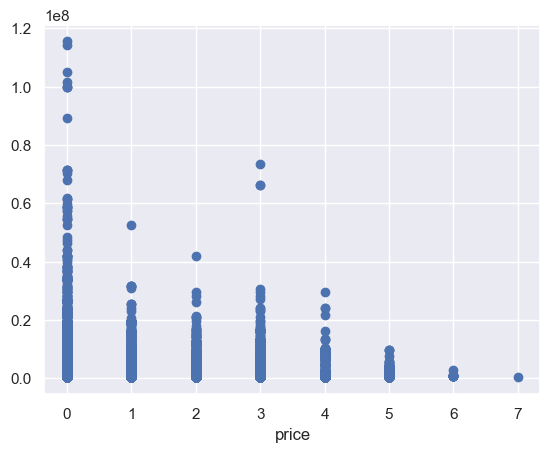

In [223]:
# Distribution of price follow number of nearby primary schools
plt.scatter(df.number_of_nearby_secondary_schools,df.price)
plt.xlabel('number of nearby secondary schools')
plt.xlabel('price')

<h3> Commercial centre</h3>

In [226]:
df_cc = pd.read_csv('data/auxiliary-data/sg-commerical-centres.csv')

In [227]:
def add_distance_of_specific_commercial_center(df_cc,cc_name, df):
    print(cc_name)
    df[cc_name] = df.apply(lambda row: get_distance_to_nearest_facility(df_cc[df_cc.name == cc_name], row), axis=1) # in 1km
    return df

In [ ]:
# Distance to each commercial centre
for cname in df_cc.name.unique():
    df = add_distance_of_specific_commercial_center(df_cc,cname, df)

<h4> Distance to nearest commercial centre</h4>

In [235]:
def get_distance_of_commercial_center_type(df_cc_type,r):
    cc_in_type = df_cc_type.name
    return r[cc_in_type].min()

def add_distance_of_commercial_center_type(df_cc,cc_type, df):
    df[cc_type] = df.apply(lambda row: get_distance_of_commercial_center_type(df_cc[df_cc.type == cc_type], row), axis=1) # in 1km
    return df

In [236]:
for ctype in df_cc.type.unique():
    df2 = add_distance_of_commercial_center_type(df_cc,ctype, df)

Text(0, 0.5, 'price')

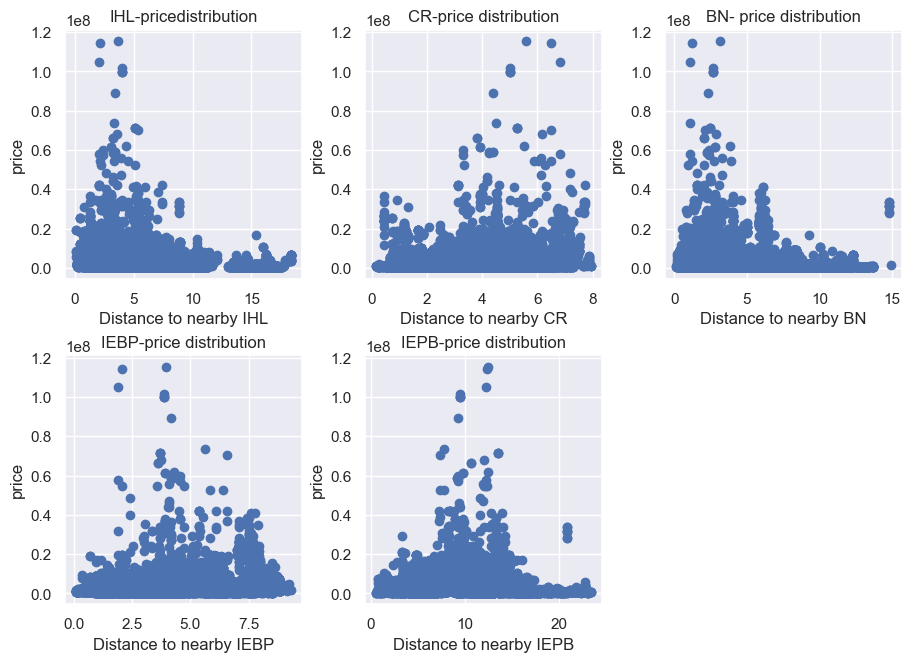

In [247]:
# Distribution of built year in different general property type
sns.set(font_scale=1)
fig = plt.figure(constrained_layout=True,figsize=(9,9))
gs = matplotlib.gridspec.GridSpec(3, 3, figure=fig)
group_att = 'floor_level'

ax1 = plt.subplot(gs[0,0])
ax1.title.set_text('IHL-pricedistribution')
ax1.scatter(df.IHL,df.price)
ax1.set_xlabel('Distance to nearby IHL')
ax1.set_ylabel('price')

ax2 = plt.subplot(gs[0,1])
ax2.title.set_text('CR-price distribution')
ax2.scatter(df.CR,df.price)
ax2.set_xlabel('Distance to nearby CR')
ax2.set_ylabel('price')

ax2 = plt.subplot(gs[0,2])
ax2.title.set_text('BN- price distribution')
ax2.scatter(df.BN,df.price)
ax2.set_xlabel('Distance to nearby BN')
ax2.set_ylabel('price')

ax2 = plt.subplot(gs[1,0])
ax2.title.set_text('IEBP-price distribution')
ax2.scatter(df.IEBP,df.price)
ax2.set_xlabel('Distance to nearby IEBP')
ax2.set_ylabel('price')

ax2 = plt.subplot(gs[1,1])
ax2.title.set_text('IEPB-price distribution')
ax2.scatter(df.IEPB,df.price)
ax2.set_xlabel('Distance to nearby IEPB')
ax2.set_ylabel('price')


<h4> Name of nearby commercial center by type</h4>

In [248]:
def check_cc_name(r,df_cc,cc_type):
    min_cc = 'None'
    min_dist = 8
    for idx, cc in df_cc.iterrows():
        if cc['type'] == cc_type:
            if r[cc['name']] < min_dist:
                min_dist = r[cc['name']] 
                min_cc = cc['name']
    return min_cc

In [249]:
for cc_type in df_cc.type.unique():
    df2['name_of_nearby_'+cc_type] = df2.apply(lambda r : check_cc_name(r,df_cc,cc_type),axis = 1)

In [263]:
df2.name_of_nearby_CR

0          Seletar Regional Centre
1          Seletar Regional Centre
2        Central Business District
3        Central Business District
4        Central Business District
                   ...            
20249      Seletar Regional Centre
20250    Central Business District
20251    Central Business District
20252    Woodlands Regional Centre
20253    Central Business District
Name: name_of_nearby_CR, Length: 20147, dtype: object

Text(0, 0.5, 'price')

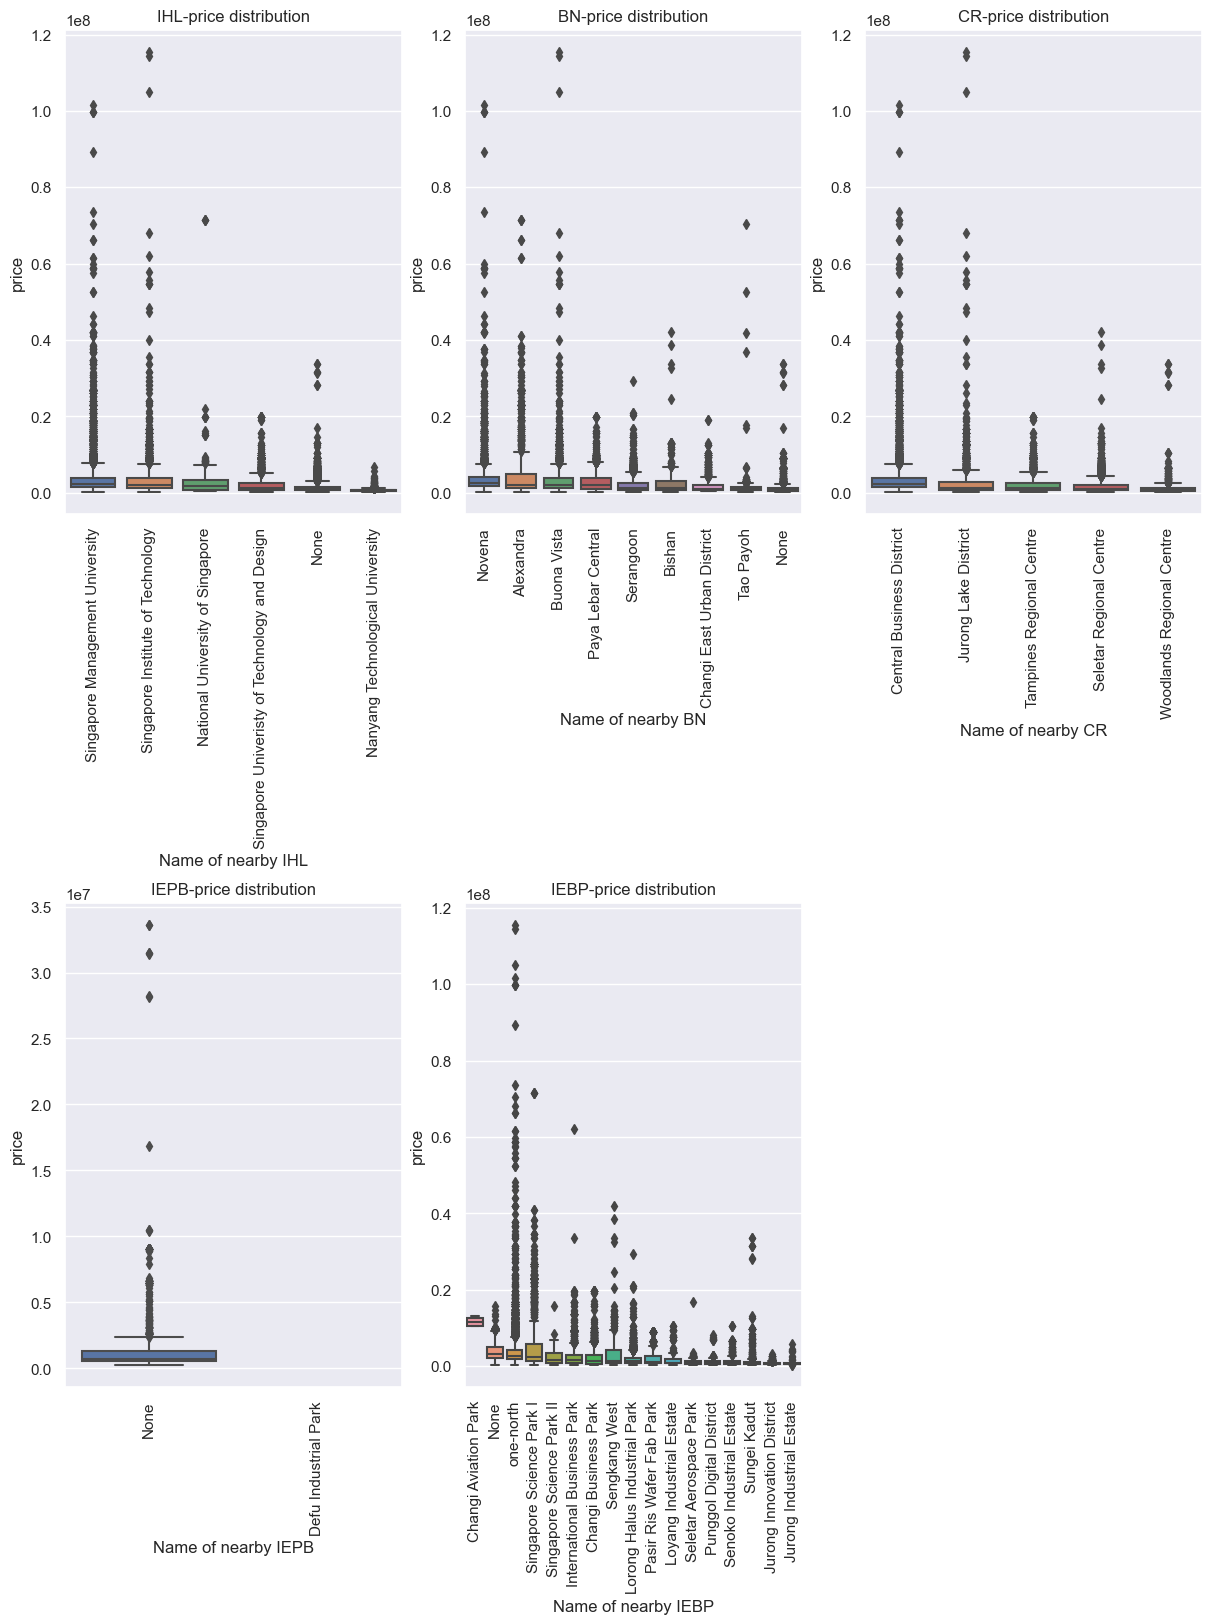

In [272]:
# Distribution of built year in different general property type
sns.set(font_scale=1)
fig = plt.figure(constrained_layout=True,figsize=(12,21))
gs = matplotlib.gridspec.GridSpec(3, 3, figure=fig)
group_att = 'floor_level'

ax1 = plt.subplot(gs[0,0])
ax1.title.set_text('IHL-price distribution')
table = df2.groupby(['name_of_nearby_IHL'],as_index=False)['price'].median().sort_values(by='price',ascending=False)
ax1 = sns.boxplot(data=df2,x='name_of_nearby_IHL',y="price",order=table['name_of_nearby_IHL'].to_list())
#sns.boxplot(data = df2,x='name_of_nearby_IHL',y='price')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('Name of nearby IHL')
ax1.set_ylabel('price')

ax1 = plt.subplot(gs[0,1])
ax1.title.set_text('BN-price distribution')
table = df2.groupby(['name_of_nearby_BN'],as_index=False)['price'].median().sort_values(by='price',ascending=False)
ax1 = sns.boxplot(data=df2,x='name_of_nearby_BN',y="price",order=table['name_of_nearby_BN'].to_list())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('Name of nearby BN')
ax1.set_ylabel('price')

ax1 = plt.subplot(gs[0,2])
ax1.title.set_text('CR-price distribution')
table = df2.groupby(['name_of_nearby_CR'],as_index=False)['price'].median().sort_values(by='price',ascending=False)
ax1 = sns.boxplot(data=df2,x='name_of_nearby_CR',y="price",order=table['name_of_nearby_CR'].to_list())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('Name of nearby CR')
ax1.set_ylabel('price')

ax1 = plt.subplot(gs[1,1])
ax1.title.set_text('IEBP-price distribution')
table = df2.groupby(['name_of_nearby_IEBP'],as_index=False)['price'].median().sort_values(by='price',ascending=False)
ax1 = sns.boxplot(data=df2,x='name_of_nearby_IEBP',y="price",order=table['name_of_nearby_IEBP'].to_list())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('Name of nearby IEBP')
ax1.set_ylabel('price')

ax1 = plt.subplot(gs[1,0])
ax1.title.set_text('IEPB-price distribution')
table = df2.groupby(['name_of_nearby_IEPB'],as_index=False)['price'].median().sort_values(by='price',ascending=False)
ax1 = sns.boxplot(data=df2,x='name_of_nearby_BN',y="price",order=table['name_of_nearby_IEPB'].to_list())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('Name of nearby IEPB')
ax1.set_ylabel('price')


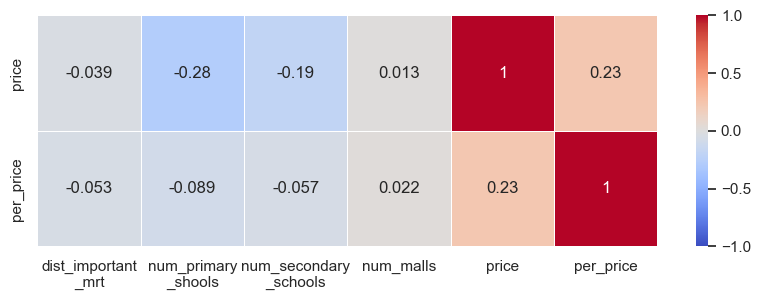

In [266]:
"""
Heat map for visualizing correlations
"""
df_corr = df[['dist_to_nearest_important_mrt_rounded','number_of_nearby_primary_schools','number_of_nearby_secondary_schools','number_of_nearby_shopping_malls','price','per_price']]
corr = df_corr.corr()[['price','per_price']]
fig = plt.figure(figsize=(10,3))
x_axis_labels = ['dist_important\n_mrt','num_primary\n_shools','num_secondary\n_schools','num_malls','price','per_price'] 
sns.heatmap(corr.T,annot=True,xticklabels=x_axis_labels,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0)

plt.show()

<h2>Cleaned Dataset</h2>

In [267]:
df_final = pd.read_csv('./data/train_final_complete.csv')

In [268]:
print('Cleaned data num',len(df_final))

Cleaned data num 20003


<AxesSubplot:title={'center':'Log-scale distribution of per_price'}, xlabel='per_price', ylabel='Count'>

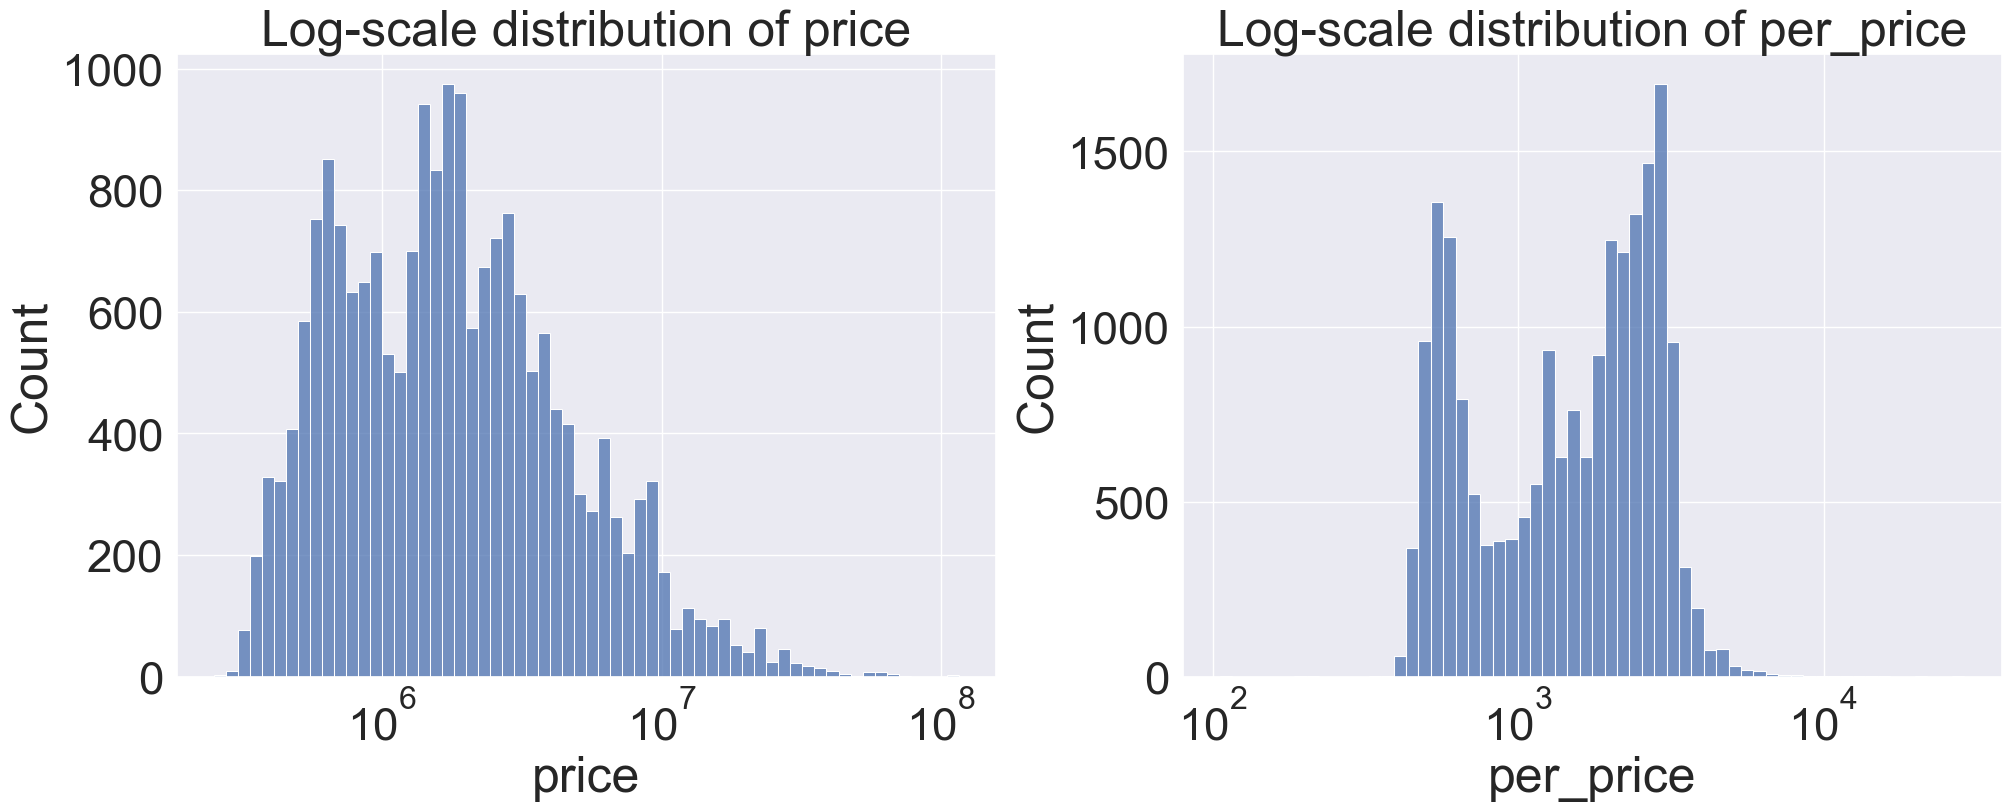

In [269]:
# Compare the distribution between price and price per square foot(per_price)
sns.set(font_scale=3)
fig = plt.figure(constrained_layout=True,figsize=(20,8))
gs = matplotlib.gridspec.GridSpec(2, 2, figure=fig)
#price
ax1 = plt.subplot(gs[:,0])
ax1.title.set_text('Log-scale distribution of price')
sns.histplot(data=df_final, x="price",log_scale=True)
#   per_price
ax2 = plt.subplot(gs[:,1])
ax2.title.set_text('Log-scale distribution of per_price')
sns.histplot(data=df_final, x="per_price",log_scale=True)